<a href="https://colab.research.google.com/github/ZhihengChang/Stock_Price_Perdiction/blob/master/DCS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction Program**
---
**Description**: This program predict stock prices by using machine learning models.

### **Initialization**




In [0]:
pip install quandl

In [0]:
pip list

In [0]:
import io
import quandl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from google.colab import files

%matplotlib inline

### **Understanding Stock data**


*   **Day high and low**
> the highest and lowest prices at which the stock traded throughout the day, from market open to market close. However, the day high and low may not be the open and close prices - those are separate figures. 


* **Open and close price**
> The open price is the price at which the stock opened trading on any given day. The close is the price at which the stock stopped trading during normal trading hours (after-hours trading can impact the stock price as well). If a stock closes above the previous close, it is considered an upward movement for the stock. Vice versa, if a stock's close price is below the previous day's close, the stock is showing a downward movement.  








**Get** the stock data:

In [7]:
#df = quandl.get("WIKI/FB", authtoken='6DkKgVWbLSphsJmwJ691')
uploaded = files.upload()


Saving FB.csv to FB.csv


In [8]:
df_FB = pd.read_csv(io.BytesIO(uploaded['FB.csv']))
df_FB.set_index('Date', inplace=True, drop=True)
df_FB.head() 
df_FB.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-03,197.600006,198.929993,195.080002,198.820007,198.820007,11595300
2019-12-04,200.000000,200.029999,198.050003,198.710007,198.710007,8456300
2019-12-05,199.860001,201.289993,198.210007,199.360001,199.360001,9740400
2019-12-06,200.500000,201.570007,200.059998,201.050003,201.050003,12270600
2019-12-09,200.649994,203.139999,200.210007,201.339996,201.339996,11954800


In [9]:
#independent variable: adjusted close price
df = df_FB[['Adj Close']]
df.tail()


,Adj Close
Date,
2019-12-03,198.820007
2019-12-04,198.710007
2019-12-05,199.360001
2019-12-06,201.050003
2019-12-09,201.339996


In [10]:
df_FB.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,1762.00,1762.00,1762.00,1762.00,1762.00,1.762000e+03
mean,115.53,116.74,114.28,115.56,115.56,3.189742e+07
std,53.20,53.64,52.75,53.23,53.23,2.577250e+07
min,22.99,23.09,22.67,22.90,22.90,5.913100e+06
25%,74.56,75.25,73.74,74.58,74.58,1.616472e+07
50%,116.89,117.82,115.91,116.86,116.86,2.329385e+07
75%,167.24,168.93,165.24,167.36,167.36,3.835542e+07
max,215.72,218.62,214.27,217.50,217.50,3.654579e+08


In [11]:
#perdicting 'n' days out into the future
forecast_out = 20
#create another column (the traget or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
print(df)

             Adj Close  Prediction
Date                              
2012-12-10   27.840000   30.590000
2012-12-11   27.980000   31.299999
2012-12-12   27.580000   31.719999
2012-12-13   28.240000   30.950001
2012-12-14   26.809999   30.100000
...                ...         ...
2019-12-03  198.820007         NaN
2019-12-04  198.710007         NaN
2019-12-05  199.360001         NaN
2019-12-06  201.050003         NaN
2019-12-09  201.339996         NaN

[1762 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#Convert the df to a numpy array
X = np.array(df.drop(['Prediction'],1))
#Remove the last 'n' rows (Nan)
X = X[:-forecast_out]
print(X)

[[ 27.84    ]
 [ 27.98    ]
 [ 27.58    ]
 ...
 [191.550003]
 [190.419998]
 [190.839996]]


In [13]:
#Create y data set that holds the future price predictions
# Convert the df to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[ 30.59      31.299999  31.719999 ... 199.360001 201.050003 201.339996]


In [0]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Create Support Vector Machine 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
# Testing Model to returns the R² prediction score.
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.973695340302682


In [17]:
# Create the Linear Regression Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Testing Model：
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9749542847702865


In [19]:
# Set x_forecast equal to the last n rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[189.610001]
 [194.470001]
 [193.190002]
 [193.149994]
 [195.100006]
 [197.399994]
 [199.320007]
 [197.509995]
 [197.929993]
 [198.820007]
 [199.789993]
 [198.970001]
 [202.      ]
 [201.639999]
 [199.699997]
 [198.820007]
 [198.710007]
 [199.360001]
 [201.050003]
 [201.339996]]


In [33]:
# Print LR model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
# Print SVM model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[190.30552959 195.08387489 193.82538164 193.78604583 195.70329494
 197.96463997 199.8523941  198.0727928  198.48573426 199.36079479
 200.31448369 199.50826869 202.48735953 202.13340704 200.22599975
 199.36079479 199.25264295 199.89171615 201.55332379 201.8384445 ]
[190.74698033 181.18893195 190.23025294 190.65019028 181.93434373
 190.1496126  178.35755001 189.79971566 187.63851743 180.99143671
 177.89536337 180.01645505 186.89714719 186.79638351 177.81509287
 180.99143671 181.77761073 178.23448005 184.39455811 185.87984109]


### **Visualizing the Data** 


Moving average is used to identify the trading opportunities by taking the average of the past data points of the prices. (commonly adjust moving 'time' - 50day and 200day )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


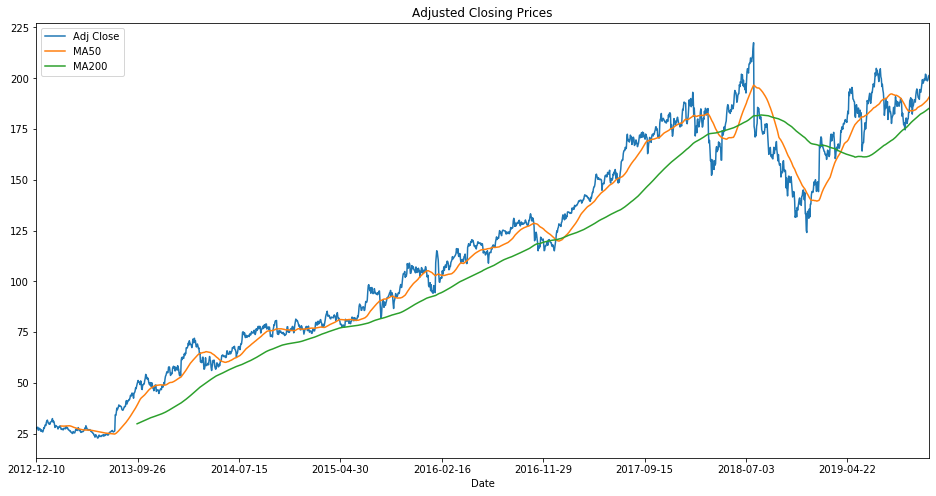

In [21]:
# plot the MA50, MA200 and adjclose  
df['MA50'] = df['Adj Close'].rolling(50).mean()
df['MA200'] = df['Adj Close'].rolling(200).mean()
df[['Adj Close','MA50','MA200']].plot(label='FB',figsize =(16,8),title='Adjusted Closing Prices')
plt.legend();


Date
2012-12-10         NaN
2012-12-11    0.005029
2012-12-12   -0.014296
2012-12-13    0.023930
2012-12-14   -0.050637
                ...   
2019-12-03   -0.004407
2019-12-04   -0.000553
2019-12-05    0.003271
2019-12-06    0.008477
2019-12-09    0.001442
Name: Adj Close, Length: 1762, dtype: float64

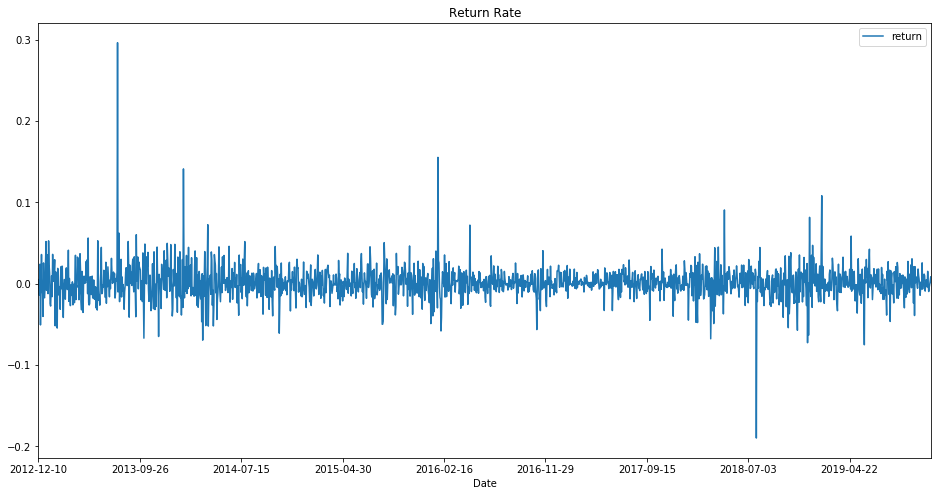

In [27]:
close = df['Adj Close']
r = close / close.shift(1) - 1
r.plot(label='return',figsize =(16,8),title='Return Rate')
plt.legend();
r


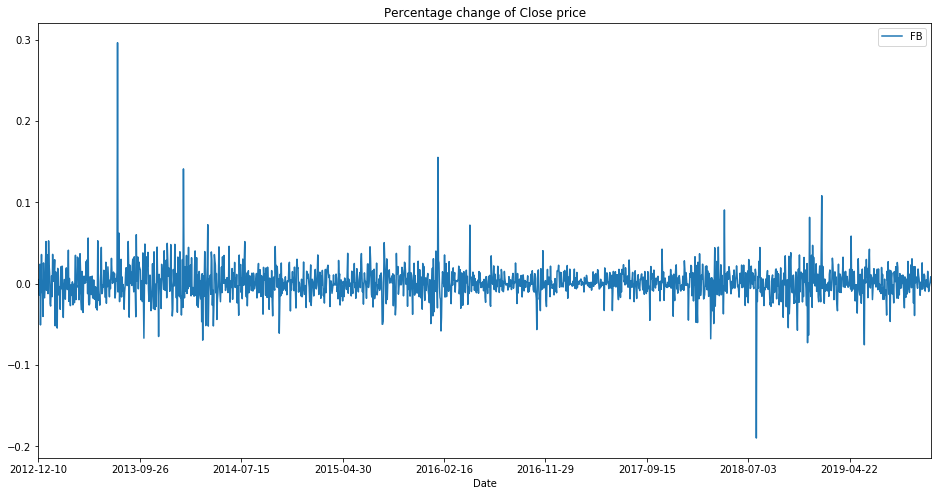

In [23]:
df_dr = df_FB['Close'].pct_change()
df_dr.plot(label='FB',figsize =(16,8),title='Percentage change of Close price')
plt.legend();

The date of the spike in trading volume for Facebook is in 2013-07-25


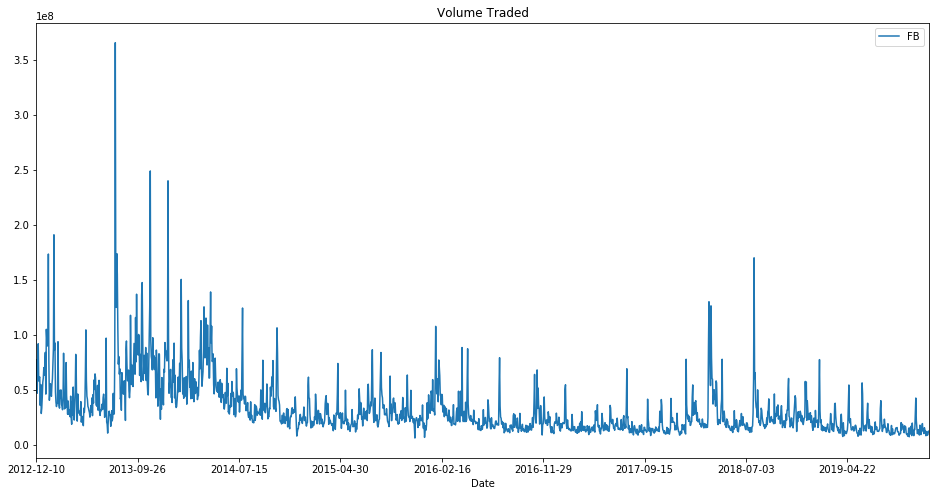

In [24]:
# plot the volume data 

df_FB['Volume'].plot(label='FB',figsize =(16,8),title='Volume Traded')
plt.legend();
print("The date of the spike in trading volume for Facebook is in", df_FB['Volume'].idxmax(axis = 0))

            lr_prediction  svm_prediction  avg_prediction
2019-12-10     190.305530      190.746980      190.526255
2019-12-11     195.083875      181.188932      188.136403
2019-12-12     193.825382      190.230253      192.027817
2019-12-13     193.786046      190.650190      192.218118
2019-12-14     195.703295      181.934344      188.818819
2019-12-15     197.964640      190.149613      194.057126
2019-12-16     199.852394      178.357550      189.104972
2019-12-17     198.072793      189.799716      193.936254
2019-12-18     198.485734      187.638517      193.062126
2019-12-19     199.360795      180.991437      190.176116
2019-12-20     200.314484      177.895363      189.104924
2019-12-21     199.508269      180.016455      189.762362
2019-12-22     202.487360      186.897147      194.692253
2019-12-23     202.133407      186.796384      194.464895
2019-12-24     200.226000      177.815093      189.020546
2019-12-25     199.360795      180.991437      190.176116
2019-12-26    

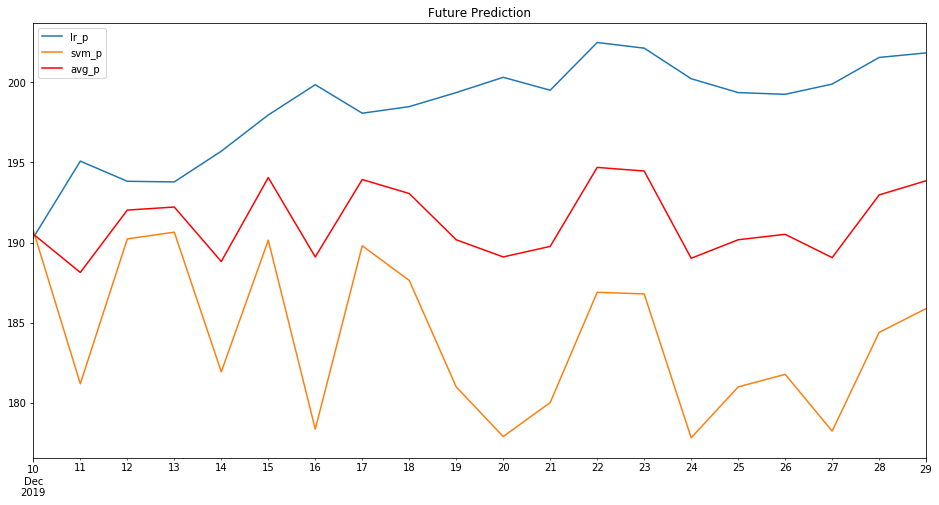

In [34]:

avg_p = (lr_prediction + svm_prediction)/2
df1=pd.DataFrame({'lr_prediction':lr_prediction, 'svm_prediction':svm_prediction,'avg_prediction':avg_p },index=pd.date_range('2019-12-10', freq='D', periods=20))
print(df1)

df1['lr_prediction'].plot(label='lr_p',figsize =(16,8),title='Future Prediction')
df1['svm_prediction'].plot(label='svm_p')
df1['avg_prediction'].plot(label='avg_p', color='red')

plt.legend();